In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cloveFunctions as clv
import matplotlib.pyplot as plt
import json

In [3]:
cnv = pd.read_csv('tcga/all_thresholded.by_genes_whitelisted.tsv', sep='\t')
exp = pd.read_csv('tcga/out_noDuplicateSLC35E2.tsv.gz',compression='gzip', sep='\t')

,Case ID,Project,Primary Site,Gender,Files,Seq,Exp,SNV,CNV,Meth,Clinical,Bio,# Mutations,# Genes,Slides
0,TCGA-A5-A0G2,TCGA-UCEC,Corpus uteri,Female,57,4,5,16,4,1,10,17,"42,051","14,357",3
1,TCGA-EO-A22U,TCGA-UCEC,Corpus uteri,Female,56,4,5,16,4,1,10,16,"26,998","12,629",2
2,TCGA-FI-A2D5,TCGA-UCEC,Corpus uteri,Female,57,4,5,16,4,1,11,16,"26,139","12,482",2
3,TCGA-AX-A2HC,TCGA-UCEC,Corpus uteri,Female,64,6,10,16,4,2,10,16,"24,853","12,205",2
4,TCGA-EO-A22R,TCGA-UCEC,Corpus uteri,Female,58,4,5,16,4,2,10,17,"24,276","11,920",3
5,TCGA-B5-A3FC,TCGA-UCEC,Corpus uteri,Female,56,4,5,16,4,1,10,16,"24,584","11,902",2
6,TCGA-IB-7651,TCGA-PAAD,Pancreas,Female,55,4,5,16,4,1,8,17,"23,084","11,453",3
7,TCGA-AP-A1DV,TCGA-UCEC,Corpus uteri,Female,54,4,5,16,2,1,10,16,"22,664","11,431",2
8,TCGA-E6-A1LX,TCGA-UCEC,Corpus uteri,Female,56,4,5,16,4,1,10,16,"23,542","11,397",2
9,TCGA-AP-A0LM,TCGA-UCEC,Corpus uteri,Female,57,4,5,16,4,1,10,17,"22,507","11,301",3


In [3]:
casedf = pd.read_csv('data/tcga_cases.20181026.tab.gz', sep='\t', compression='gzip', index_col=0)
casedf

,primary_site,submitter_id,summary,gender
0,Prostate gland,TCGA-V1-A8WS,{'data_categories': [{'data_category': 'Transc...,male
1,Breast,TCGA-AR-A24K,{'data_categories': [{'data_category': 'Transc...,female
2,Prostate gland,TCGA-EJ-5503,{'data_categories': [{'data_category': 'Transc...,male
3,Kidney,TCGA-A4-8517,{'data_categories': [{'data_category': 'Transc...,male
4,Prostate gland,TCGA-KK-A5A1,{'data_categories': [{'data_category': 'Transc...,male
5,Brain,TCGA-08-0348,{'data_categories': [{'data_category': 'Copy N...,male
6,Eye and adnexa,TCGA-V4-A9EI,{'data_categories': [{'data_category': 'Transc...,male
7,Kidney,TCGA-B0-4833,{'data_categories': [{'data_category': 'Transc...,female
8,Retroperitoneum and peritoneum,TCGA-IF-A3RQ,{'data_categories': [{'data_category': 'Transc...,female
9,"Connective, subcutaneous and other soft tissues",TCGA-FX-A8OO,{'data_categories': [{'data_category': 'Transc...,female


In [18]:
def subset_by_tissue(expdf='data_large/out_noDuplicateSLC35E2.tsv.gz', 
                     cnvdf='data_large/all_thresholded.by_genes_whitelisted.tsv', 
                     cases='data/tcga_cases.20181026.tab.gz',
                    tissue=None):
    # load data 
    expdf = pd.read_csv(expdf, compression='gzip', sep='\t', index_col=0)
    cnvdf = pd.read_csv(cnvdf, compression='gzip', sep='\t', index_col=0)
    casedf = pd.read_csv(cases, sep='\t', compression='gzip', index_col=0)
    
    # initialize empty dfs
    t_casedf = pd.DataFrame()
    t_expdf = pd.DataFrame()
    t_cnvdf = pd.DataFrame()
    
    # concat all the cases where primary site contains query tissue
    if type(tissue) == str:
        for site in casedf['primary_site'].unique():
            if tissue.lower() in site.lower():
                t_casedf = pd.concat([t_casedf, t_casedf[t_casedf['primary_site'].str.contains(site)]])
                
    t_samples = set(t_casedf['submitter_id'].unique()).intersection(expdf.columns).intersection(cnvdf.columns)
    # test if t_samples is less than expdf columns or cnvdf columns
    # if either true, print the missing id's
    return expdf and cnvdf subsetted by t_samples columns
    
    
    return t
subset_by_tissue(tissue='bone')

['Prostate gland' 'Breast' 'Kidney' 'Brain' 'Eye and adnexa'
 'Retroperitoneum and peritoneum'
 'Connective, subcutaneous and other soft tissues' 'Rectum' 'Colon'
 'Thyroid gland' 'Stomach' 'Adrenal gland' 'Ovary' 'Uterus, NOS'
 'Other and ill-defined sites in lip, oral cavity and pharynx'
 'Corpus uteri' 'Bronchus and lung'
 'Hematopoietic and reticuloendothelial systems' 'Pancreas' 'Larynx'
 'Bladder' 'Esophagus' 'Thymus' 'Testis' 'Cervix uteri'
 'Heart, mediastinum, and pleura' 'Hypopharynx' 'Skin'
 'Rectosigmoid junction' 'Liver and intrahepatic bile ducts'
 'Other and unspecified parts of tongue' 'Lymph nodes' 'Tonsil'
 'Base of tongue' 'Floor of mouth' 'Oropharynx' 'Meninges'
 'Other and unspecified parts of mouth' 'Palate'
 'Other and unspecified parts of biliary tract' 'Gum'
 'Other and ill-defined sites'
 'Bones, joints and articular cartilage of other and unspecified sites'
 'Unknown primary site' 'Bones, joints and articular cartilage of limbs'
 'Spinal cord, cranial nerves,

In [8]:
def parse_tcga(cases='LUAD_cases_2018-03-23.json'):
    """
    gets tcga cnv and copy number data into shape
    :param cases
    """
    sample_list = list(pd.read_json(cases)['submitter_id'])
    
parse_tcga()


ValueError: Expected object or value

In [5]:
# LUAD	Lung adenocarcinoma
# LUSC	Lung squamous cell carcinoma
# BRCA	Breast invasive carcinoma

# below json files exported from json export of respective tissue searches from https://gdc.cancer.gov/
# samples are first TCGA-XX-XXXX of extended id barcode


brca_samples = list(pd.read_json('tcga/BRCA_cases_2018-03-23.json')['submitter_id'])
luad_samples = list(pd.read_json('tcga/LUAD_cases_2018-03-23.json')['submitter_id'])
lusc_samples = list(pd.read_json('tcga/LUSC_cases_2018-03-23.json')['submitter_id'])

samples = [brca_samples, luad_samples, lusc_samples]
sample_names = ['brca', 'luad', 'lusc']

ValueError: Unexpected character found when decoding 'true'

In [ ]:
cnv = pd.read_csv('tcga/all_thresholded.by_genes_whitelisted.tsv', sep='\t')
exp = pd.read_csv('tcga/out_noDuplicateSLC35E2.tsv.gz',compression='gzip', sep='\t')

In [ ]:
cnv[['Gene Symbol', 'Locus ID', 'Cytoband']].to_pickle('geneSymbol_locus_cytoband.p')

In [7]:
name = exp['gene_id'].str.split('|').apply(pd.Series)
name.columns=['gene_id','junk']
del name['junk']

,gene_id,junk
0,?,100130426
1,?,100133144


In [21]:
exp = exp.merge(right=name, left_index=True, right_index=True)

In [28]:
del exp['gene_id_x']
exp.set_index('gene_id_y', drop=True, inplace=True)
exp.rename_axis('gene_id', axis=0, inplace=True)  # inplace arguement appears not to work in this situation

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-CG-4449-01A-01R-1157-13,TCGA-CG-4462-01A-01R-1157-13,TCGA-CG-4465-01A-01R-1157-13,TCGA-CG-4466-01A-01R-1157-13,TCGA-CG-4469-01A-01R-1157-13,TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4477-01A-01R-1157-13
gene_id,,,,,,,,,,,,,,,,,,,,,
?,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
?,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,...,4.358154,5.676995,5.219350,14.846708,20.115492,6.997533,18.311906,12.057112,18.628740,17.874417
?,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,...,2.656360,3.342794,2.423442,5.055287,11.626054,13.654193,7.417109,11.585177,11.482418,14.919338
?,149.1350,81.0777,86.4879,53.9117,66.9063,103.5060,94.9316,78.1955,69.2389,155.7090,...,633.299781,294.018042,686.569179,563.573453,1039.307597,639.238135,742.479964,506.336449,712.452165,703.713324
?,2034.1000,1304.9300,1054.6600,2350.8900,1257.9900,1866.4300,995.0270,1762.1200,1213.5300,2005.5700,...,1202.538277,644.002317,1181.884532,663.885074,647.530395,1297.152549,1152.909807,1375.495774,971.893874,1736.988111
?,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
?,274.2550,199.3020,348.3930,439.1940,149.2150,64.5808,377.9530,274.3640,243.1290,93.5725,...,87.408466,140.001693,108.852744,117.607340,303.513122,57.924566,166.813851,115.805483,188.696451,96.991756
?,1.4409,0.0000,0.5925,0.7746,0.0000,0.0000,1.6577,0.0000,2.1142,0.0000,...,0.489337,0.527482,0.087451,1.201876,0.087451,0.513451,0.497339,0.087451,1.303840,0.087451
?,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
exp = exp.rename_axis('gene_id', axis=0)  # this works, though

In [35]:
# exp.to_csv('tcga/exp_tab.gz', compression='gzip')

In [3]:
# mRNA data originally from /projects/sysbio/tcga/out_noDuplicateSLC35E2.tsv 
exp = pd.read_csv('tcga/exp_tab.gz', compression='gzip')

In [ ]:
cnv = pd.read_csv('tcga/cnv_tab.gz', compression='gzip')

In [50]:
# cnv.to_csv('tcga/cnv_tab.gz', sep='\t', compression='gzip')

In [43]:
# exp.to_csv('tcga/exp_tab.gz', sep='\t', compression='gzip')

In [81]:
brca_samples = list(pd.read_json('tcga/BRCA_cases_2018-03-23.json')['submitter_id'])
luad_samples = list(pd.read_json('tcga/LUAD_cases_2018-03-23.json')['submitter_id'])
lusc_samples = list(pd.read_json('tcga/LUSC_cases_2018-03-23.json')['submitter_id'])

samples = [brca_samples, luad_samples, lusc_samples]
sample_names = ['brca', 'luad', 'lusc']

brca_cnv, brca_exp = tcgaTissueSelect(brca_samples, 'brca', cnv, exp, save='tcga/')

In [208]:
b_cnv, b_exp = clv.tcgaTissueSelect(brca_samples, 'brca', cnv, exp)

NameError: name 'cnv' is not defined

In [214]:
brca_exp.to_csv('tcga/brca_exp.tab.gz', sep='\t', compression='gzip')

In [203]:
# binerize copy number values (1=del, 0=nodel) for both het and hom loss
brca_cnv_het = brca_cnv[(brca_cnv == 0) | (brca_cnv == -1)].replace(to_replace=-1, value=1).astype(dtype='float32')
brca_cnv_hom = brca_cnv[(brca_cnv == 0) | (brca_cnv == -2)].replace(to_replace=-2, value=1).astype(dtype='float32')

In [211]:
# # saving progress
# brca_cnv_het.to_csv('tcga/brca_cnv_het.tab.gz', sep='\t', compression='gzip')
# brca_cnv_hom.to_csv('tcga/brca_cnv_hom.tab.gz', sep='\t', compression='gzip')

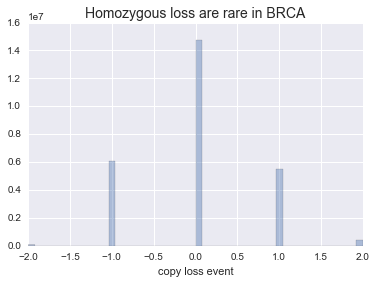

In [162]:
%matplotlib inline
sns.distplot(brca_cnv.values.flatten(), norm_hist=False, kde=False)
plt.title('Homozygous loss are rare in BRCA', {'fontsize':14})
plt.xlabel('copy loss event')
plt.show()

In [122]:
# each element in below arrays is number of events in a sample
no_loss = brca_cnv[brca_cnv == 0].count(axis=1)      # no loss seen, neutral copy
event_df = pd.DataFrame(no_loss, columns=['no_loss'])

event_df['hom_gain'] = brca_cnv[brca_cnv == 2].count(axis=1)    # homozygous gain events
event_df['het_gain'] = brca_cnv[brca_cnv == 1].count(axis=1)    # heterozygous gain events

event_df['het_loss'] = brca_cnv[brca_cnv == -1].count(axis=1)    # heterozygous loss events
event_df['hom_loss'] = brca_cnv[brca_cnv == -2].count(axis=1)    # homozygous loss events

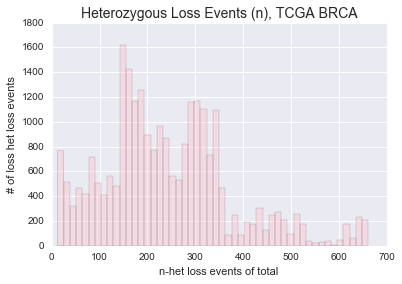

In [163]:
%matplotlib inline
sns.distplot(event_df['het_loss'], kde=False, color='pink')
plt.title('Heterozygous Loss Events (n), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss het loss events')
plt.xlabel('n-het loss events of total')
plt.show()

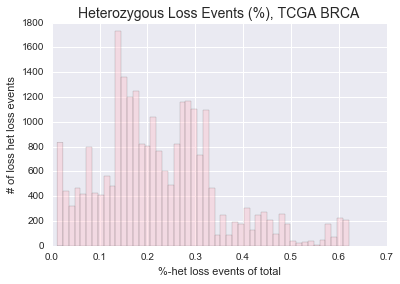

In [164]:
%matplotlib inline
sns.distplot(event_df['het_loss']/event_df.sum(axis=1), kde=False, color='pink')
plt.title('Heterozygous Loss Events (%), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss het loss events')
plt.xlabel('%-het loss events of total')
plt.show()

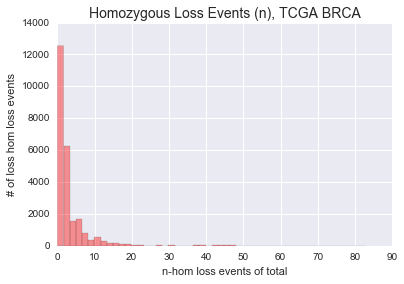

In [165]:
%matplotlib inline
sns.distplot(event_df['hom_loss'], kde=False, color='red')
plt.title('Homozygous Loss Events (n), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss hom loss events')
plt.xlabel('n-hom loss events of total')
plt.show()

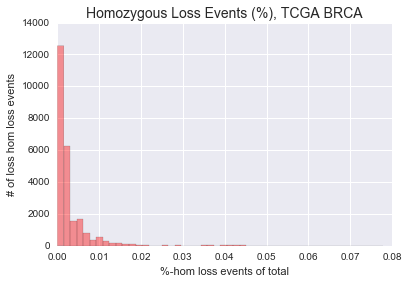

In [166]:
%matplotlib inline
sns.distplot(event_df['hom_loss']/event_df.sum(axis=1), kde=False, color='red')
plt.title('Homozygous Loss Events (%), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss hom loss events')
plt.xlabel('%-hom loss events of total')
plt.show()

More samples with normal BRCA copy levels than with loss.  Why?

In [172]:
event_df.loc[event_df.index.str.contains('BRCA')]

,no_loss,hom_gain,het_gain,het_loss,hom_loss
gene_id,,,,,
BRCA2,508,8,108,428,14
BRCA1,488,12,198,363,5


Top 10 genes with homozygous loss.  Familliar?

In [176]:
event_df.sort_values(by='hom_loss', ascending=False).head(10)

,no_loss,hom_gain,het_gain,het_loss,hom_loss
gene_id,,,,,
CSMD1,348,12,146,477,83
ERICH1-AS1,362,6,155,487,56
LOC286083,368,6,154,483,55
DLGAP2,363,6,154,488,55
PTEN,655,4,83,269,55
FAM87A,363,4,155,490,54
FBXO25,363,4,155,490,54
OR4F21,363,4,155,490,54
RPL23AP53,363,4,155,490,54


Top 10 genes with heterozygous loss.  Familliar?

In [177]:
event_df.sort_values(by='het_loss', ascending=False).head(10)

,no_loss,hom_gain,het_gain,het_loss,hom_loss
gene_id,,,,,
DNAAF1,280,4,98,662,22
MLYCD,285,4,94,662,21
LOC400548,280,3,100,661,22
ADAD2,281,4,98,661,22
ATP2C2,281,4,98,661,22
COTL1,281,4,98,661,22
KCNG4,281,4,98,661,22
KLHL36,281,4,98,661,22
TAF1C,281,4,98,661,22


In [ ]:
# TO DO:
# run the CLOvE calculations on ~10000 random vs null samples with a variety of cutoffs (as in CCLE example)

some mapping stuff for later, maybe

In [ ]:
mapping = pd.read_csv('tcga/tcga_code_tables/diseaseStudy.tsv', sep='\t')

In [ ]:
mapping

In [ ]:
mapping[mapping['Study Name'].str.contains('Breast')]

In [78]:
# FINAL VERSION SHOULD BE IN cloveFunctions.py
def tcgaTissueSelect(samp_list, samp_name, cnv_df, exp_df, bin_cnv='het', save=False):
    """
    subsamples tcga cnv and exp dataframes into tissue-specific sample columns
    
    :param samp_list: list of str, tissue sample IDs (len 12) from TCGA cases
    :param samp_name: str, name of TCGA tissue source
    :param cnv_df: df int32, thresholded or masked copy number values, gene (index) x samples
    :param exp_df: df float32, thresholded or masked expression values, gene (index) x samples
    :param bin_cnv: bool or str, mask cnv as 1=loss 0=WT according to 'het'erozygous or 'hom'ozygous loss, default False no mask
    :param save: bool or str, str of dir/ where to save, default False
    
    returns tissue_cnv_df, tissue_exp_df
    
    :usage:
        brca_samples = list(pd.read_json('tcga/BRCA_cases_2018-03-23.json')['submitter_id'])
        brca_cnv, brca_exp = tcgaTissueSelect(brca_samples, 'brca', cnv, exp, save='tcga/')
    """
    # list of longer IDs (16) whose first 12 match the IDs in a tissue
    c_samples = [col[:16] for col in cnv_df.columns if col[:12] in samp_list]
    e_samples = [col[:16] for col in exp_df.columns if col[:12] in samp_list]

    # list of intersecting IDs whose first 12 match the IDs in a tissue
    samples = list(set(c_samples).intersection(e_samples))

    # slice down all IDs of DFs so they can match
    cnv_df.columns = [col[:16] for col in cnv_df.columns]
    exp_df.columns = [col[:16] for col in exp_df.columns]

    tissue_cnv_df = cnv[samples]
    tissue_exp_df = exp[samples]
    
    if bin_cnv == 1:
        tissue_cnv_df_het = brca_cnv[(brca_cnv == 0) | (brca_cnv == -1)].replace(to_replace=-1, value=1).astype(dtype='float32')
        
brca_cnv_hom = brca_cnv[(brca_cnv == 0) | (brca_cnv == -2)].replace(to_replace=-2, value=1).astype(dtype='float32')
    
    if save:
        tissue_cnv_df.to_csv(save + 'cnv_' + samp_name + '.tab.gz', sep='\t', compression='gzip')
        tissue_exp_df.to_csv(save + 'exp_' + samp_name + '.tab.gz', sep='\t', compression='gzip')
    
    return tissue_cnv_df, tissue_exp_df